# Ev analysis of plrnn


In [13]:
using Revise

using BPTT
using Flux
using NPZ
using LinearAlgebra
using BSON: @load
load_model

In [21]:
function gen_path(exp::String, name::String, run::Int, epoch::Int; eval=true)::BPTT.AbstractPLRNN
    load_path = joinpath(["Results", exp, name, format_run_ID(run)])
    if eval
        load_path = "../" * load_path
    end
    return joinpath(load_path, "checkpoints", "model_$epoch.bson")
end
function format_run_ID(run::Int)::String
    run_str = string(run)
    n_digits = length(run_str)
    @assert n_digits < 4
    add_zeros = 3 - n_digits
    return repeat("0", add_zeros) * run_str
end


format_run_ID (generic function with 1 method)

In [22]:

model_path = gen_path("default", "test", 1, 50)
m = load_model(model_path)

# compose single matrix AW
AW = diagm(m.A) + m.W;

# get evd of AW
EVD = eigen(AW);
λs = EVD.values;
V = EVD.vectors;


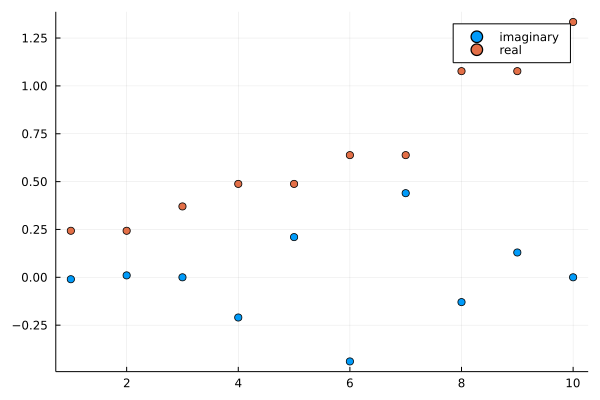

In [23]:
using Plots
scatter(imag(λs), label="imaginary")
scatter!(real(λs), label="real")

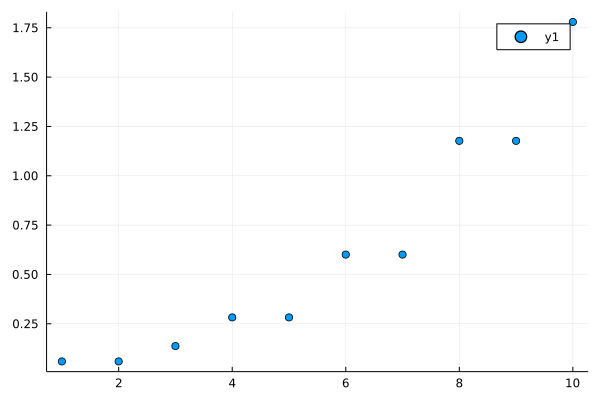

In [24]:
scatter(abs2.(λs))

# ev analasis for all models

In [28]:
# exp = lorenz_20...
function remove!(a, item)
    deleteat!(a, findall(x -> x == item, a))
end

experiments = readdir("../Results")
remove!(experiments, "default")

String[]

In [ ]:
for exp in experiments
    model_path = gen_path()
    m = load_model(model_path)

    try
        push!(λs, evd(m))
    catch e
        λs = [evd(m)]
    end